In [1]:
#import pandas to read the csv file
import warnings
import pandas as pd
dataset = pd.read_csv('heart.csv')

In [2]:
#showing some instances 
dataset.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
#correlation of age with heart disease
corr1 = dataset[['age', 'target']].dropna()

In [4]:
corr1.corr()

,age,target
age,1.000000,-0.229324
target,-0.229324,1.000000


/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

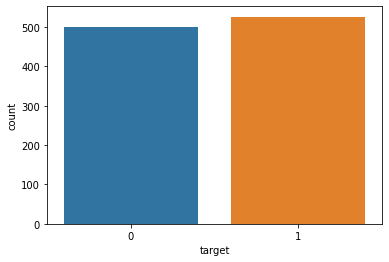

In [5]:
#lets now count the target
import seaborn as sb
count_target = sb.countplot(dataset['target'])
count_target

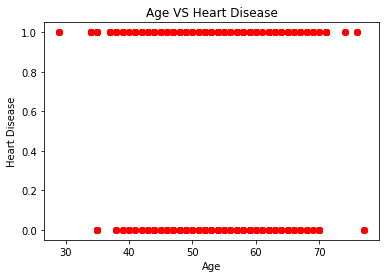

In [6]:
#lets plot a scatter plot and see
import matplotlib.pyplot as plt
plt.scatter(dataset['age'], dataset['target'], color='red')
plt.title("Age VS Heart Disease")
plt.xlabel("Age")
plt.ylabel("Heart Disease")
plt.show()

In [7]:
#now split dataset into dependent and independent variables
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [8]:
#now lets split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Minimum error:- 0.0 at K = 1


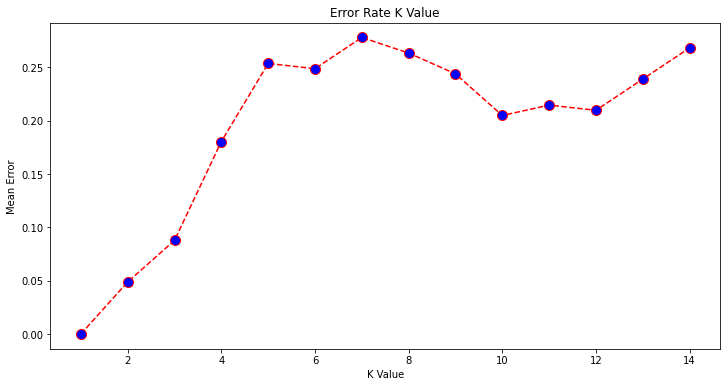

In [10]:
#checking for the best value of k
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
error = []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [11]:
#now import the classifier
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
#now predict the outcome
y_predict = classifier.predict(x_test)

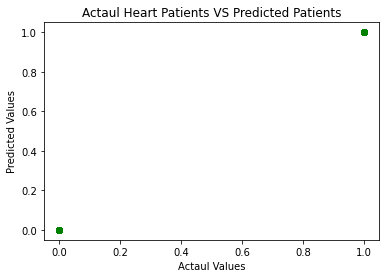

In [13]:
#now lets find the relationship between the actual values and predicted values
plt.scatter(y_test, y_predict, color='green')
plt.title("Actaul Heart Patients VS Predicted Patients")
plt.xlabel("Actaul Values")
plt.ylabel("Predicted Values")
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
print("accuracy of model is ", accuracy_score(y_test, y_predict))

accuracy of model is  1.0


In [15]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predict, y_test)

In [16]:
cm

array([[ 98,   0],
       [  0, 107]])